#1. Introducción

El tema asignado al grupo 8 es la adición de dos imágenes. 

Como primer paso, se debe validar que las dos imágenes tengan el mismo tamaño. En caso de que esto no se cumpla, se modificará el tamaño de ambas imágenes a un promedio de las dos, para que cumplan con dicha igualdad en tamaño.
Luego de realizar la validación, se procederá a calcular la sumatoria para cada componente de la imagen (recordemos que una imagen se divide en múltiples pixeles, y a su vez, cada pixel está compuesto por tres colores rojo (R), verde (G) y azul (B) ).

Para calcular cada componente del pixel (variables R, G y B) sumaremos cada componente individual de cada imagen, asignándolo a su correspondiente color.

Los componentes con índice 1 corresponden a la primera imagen y los que tienen índice 2 corresponden a la segunda imagen. La división por dos en cada componente se realiza para mejorar el resultado final ya que se reduce la saturación en la imagen.


#2. Armado del ambiente

##2.1 Imágenes

Acá es donde se debe ingresar la URL de las dos imágenes a adicionar para que luego ejecuten en el contexto de ejecución del módulo de CUDA.

In [ ]:
#@markdown ### Ingrese la URL de la primer imágen
url_imagen1 = "https://wallpaperaccess.com/full/2970443.jpg" #@param {type:"string"}

#@markdown ---
#@markdown ### Ingrese la URL de la segunda imágen
url_imagen2 = "http://www.fonditos3d.com/1024x768/fondo-3d-de-gatos.jpg" #@param {type:"string"}
#url_imagen2 = "https://s11.favim.com/orig/7/759/7598/75985/pink-aesthetic-sunglasses-Favim.com-7598576.jpg" #@param {type:"string"}

#Valido los URL 
if not (type(url_imagen1) is str) or (url_imagen1 == ""):
  raise TypeError("Debe ingresar una dirección url_imagen1 válida")
if not (type(url_imagen2) is str) or (url_imagen2 == ""):
  raise TypeError("Debe ingresar una dirección url_imagen2 válida")

#Leo las url de las imagenes ingresadas.
!wget {url_imagen1} -O imagen1.jpg
!wget {url_imagen2} -O imagen2.jpg


--2021-11-24 21:15:33--  https://wallpaperaccess.com/full/2970443.jpg
Resolving wallpaperaccess.com (wallpaperaccess.com)... 104.22.33.65, 172.67.7.204, 104.22.32.65, ...
Connecting to wallpaperaccess.com (wallpaperaccess.com)|104.22.33.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133176 (130K) [image/jpeg]
Saving to: ‘imagen1.jpg’

imagen1.jpg         100%[===================>] 130.05K  --.-KB/s    in 0.02s   

2021-11-24 21:15:33 (5.73 MB/s) - ‘imagen1.jpg’ saved [133176/133176]

--2021-11-24 21:15:33--  http://www.fonditos3d.com/1024x768/fondo-3d-de-gatos.jpg
Resolving www.fonditos3d.com (www.fonditos3d.com)... 45.131.80.58
Connecting to www.fonditos3d.com (www.fonditos3d.com)|45.131.80.58|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fonditos3d.com/1024x768/fondo-3d-de-gatos.jpg [following]
--2021-11-24 21:15:34--  https://www.fonditos3d.com/1024x768/fondo-3d-de-gatos.jpg
Connecting to www.fondi

## 2.2 Módulo CUDA

Se instala en el cuaderno el módulo CUDA de python.

In [ ]:
!pip install pycuda

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 66 kB 4.4 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627577 sha256=f1d68e0e3a6d6f2e5d2791b87eb206869f7d9a9f30004ff3c8b9f82914af5fe5
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2021.2.9-py2.py3-none-any.whl size=62370 sha256=09da606015fad84de2e396f5be6ec2652cd06cdad83a9bb5b505e19253920e08
  Stored in directory: /root/.cache/pip/wheels/41/b9/6e/94bb014f6484b15ec77e7877f3a227609481ffd98db364504d
Successfully built pycuda pytools


#3. Desarrollo CPU

Ejecución del algoritmo adición de dos imágenes en CPU.

Imagen1: imagen1.jpg -RGB- [1366, 768]
Imagen2: imagen2.jpg -RGB- [1024, 768]
Imagen resultado: [1195, 768]
Tiempo de conversión de imagen: 19570.201 [ms]
Tiempo Total: 19777.486 [ms]


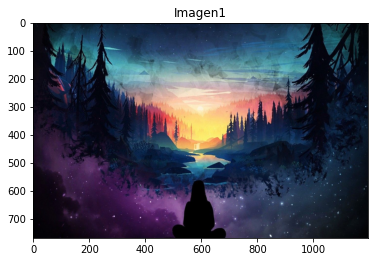

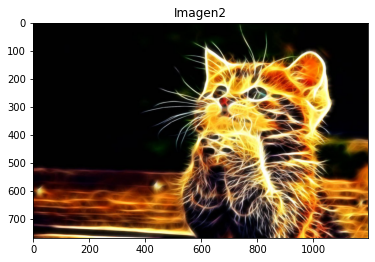

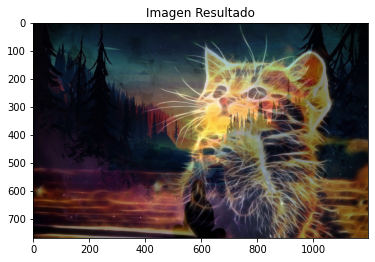

In [ ]:
%matplotlib inline
from datetime import datetime

tiempo_total = datetime.now()

import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

# --------------------------------------------
# Definición de función que transforma el tiempo en milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

try:
  img1_nombre = 'imagen1.jpg'
  image1 = Image.open( img1_nombre ) 
except:
  raise Exception("Fallo al abrir la imagen 1. Revisar el armado del ambiente")

try:
  img2_nombre = 'imagen2.jpg'
  image2 = Image.open( img2_nombre ) 
except:
  raise Exception("Fallo al abrir la imagen 2. Revisar el armado del ambiente")

if(image1.format != 'JPEG'):
  raise Exception("La imágen 1 acepta solo formato .jpg")
if(image2.format != 'JPEG'):
  raise Exception("La imágen 2 acepta solo formato .jpg")

# Obtengo las proporciones de la imagen. 
img1_ancho, img1_alto = image1.size 
img2_ancho, img2_alto = image2.size 

# Si las imagenes no son del mismo tamaño, las convierto a un tamaño promedio entre las dos
imagenResultado_ancho = (int)((img1_ancho + img2_ancho)/2)
imagenResultado_alto  =  (int)((img1_alto + img2_alto)/2)

image1 = image1.resize((imagenResultado_ancho, imagenResultado_alto))
image2 = image2.resize((imagenResultado_ancho, imagenResultado_alto))
# Obtengo la proporcion con la que quedaron ambas imagenes
#imagenResultado_ancho, imagenResultado_alto = image1.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img1_pic_cpu = numpy.asarray(image1).astype(numpy.int32())
img2_pic_cpu = numpy.asarray(image2).astype(numpy.int32())

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
imgResultado_picR_cpu = numpy.empty_like(img1_pic_cpu)

# Muestro los atributos de la imagen y como se ve antes de la adición.
print("Imagen1: " + img1_nombre + " -" + image1.mode + "- [" + str(img1_ancho) + ", " + str(img1_alto) + "]" )  
plt.figure()
imgplot1=plt.imshow( img1_pic_cpu ), plt.title('Imagen1')

print("Imagen2: " + img2_nombre + " -" + image2.mode + "- [" + str(img2_ancho) + ", " + str(img2_alto) + "]" )  
plt.figure()
imgplot2=plt.imshow( img2_pic_cpu ), plt.title('Imagen2')

tiempo_img = datetime.now()

# Realizo la suma de ambas imagenes
for y  in range( 0, imagenResultado_ancho ):
  for x in range( 0, imagenResultado_alto ):
    pixel_R1, pixel_G1, pixel_B1 = img1_pic_cpu[x][y]
    pixel_R2, pixel_G2, pixel_B2 = img2_pic_cpu[x][y]
    R = (pixel_R1 / 2) + (pixel_R2 / 2)
    G = (pixel_G1 / 2) + (pixel_G2 / 2)
    B = (pixel_B1 / 2) + (pixel_B2 / 2)
    imgResultado_picR_cpu[x][y] = [R, G, B]

tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de aplicar la adición.
print("Imagen resultado: " + "[" + str(imagenResultado_ancho) + ", " + str(imagenResultado_alto ) + "]" )  
plt.figure()
imgplot1 = plt.imshow( imgResultado_picR_cpu ), plt.title('Imagen Resultado')

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )

#4. Desarrollo GPU

Ejecución del algoritmo adición de dos imágenes en GPU.

Imagen1: imagen1.jpg -RGB- [1366, 768]
Imagen2: imagen2.jpg -RGB- [1024, 768]
Thread: [ 32 , 32  ], Bloque : [ 43 , 24 ]
Total de Thread: [ 1376 , 768  ]  =  1056768
Imagen resultado: [1366, 768]
Tiempo GPU  :  0.222 [ms]
Tiempo Total:  184.011 [ms]


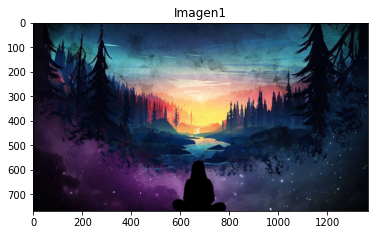

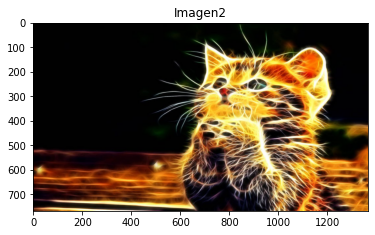

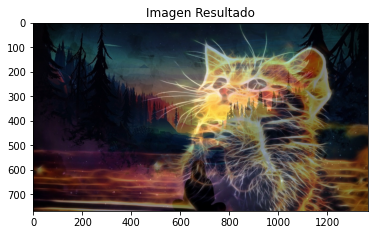

In [ ]:
%matplotlib inline
from datetime import datetime
tiempo_total = datetime.now()

import matplotlib.pyplot as plt
import numpy
from PIL import Image 
try :
  import pycuda.driver as cuda
except ModuleNotFoundError:
  sys.exit("No se pudo importar el paquete cuda. Primero se debe correr el armado del ambiente para que se pueda descargar.")
import pycuda.autoinit
from pycuda.compiler import SourceModule

# --------------------------------------------
#@title 3.1 Dimensiones de los hilos

hilo_x =   32#@param {type: "number"}
hilo_y =   32#@param {type: "number"}

# --------------------------------------------


# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

try:
  img1_nombre = 'imagen1.jpg'
  image1 = Image.open( img1_nombre ) 
except:
  raise Exception("No se pudo abrir la imagen 1. Primero debe correr el armado del ambiente")

try:
  img2_nombre = 'imagen2.jpg'
  image2 = Image.open( img2_nombre ) 
except:
  raise Exception("No se pudo abrir la imagen 2. Primero debe correr el armado del ambiente")

if(image1.format != 'JPEG'):
  raise Exception("La imágen 1 no tiene formato .jpg")
if(image2.format != 'JPEG'):
  raise Exception("La imágen 2 no tiene formato .jpg")

# Obtengo las proporciones de la imagen. 
img1_ancho, img1_alto = image1.size
img2_ancho, img2_alto = image2.size

# Si las imagenes no son del mismo tamaño, obtengo un promedio para redimensionarlas
imagenResultado_ancho = (int)((img1_ancho + img2_ancho)/2)
imagenResultado_alto  =  (int)((img1_alto + img2_alto)/2)

image1 = image1.resize((imagenResultado_ancho, imagenResultado_alto))
image2 = image2.resize((imagenResultado_ancho, imagenResultado_alto))  

# Obtengo la proporcion con la que quedaron ambas imagenes
imagenResultado_ancho, imagenResultado_alto = image1.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img1_pic_cpu = numpy.asarray(image1).astype(numpy.int32())
img2_pic_cpu = numpy.asarray(image2).astype(numpy.int32())


# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
imgResultado_picR_cpu = numpy.empty_like(img1_pic_cpu)

# Reservo los 3 vectores en GPU (3 pixeles usa RGB * el tamaño del array)
img1_pic_gpu = cuda.mem_alloc(img1_pic_cpu.nbytes)
img2_pic_gpu = cuda.mem_alloc(img2_pic_cpu.nbytes)
imgResultado_picR_gpu = cuda.mem_alloc( imgResultado_picR_cpu.nbytes)

# GPU - Copio la memoria al GPU
cuda.memcpy_htod( img1_pic_gpu, img1_pic_cpu )
cuda.memcpy_htod( img2_pic_gpu, img2_pic_cpu )
cuda.memcpy_htod( imgResultado_picR_gpu, imgResultado_picR_cpu )

#CPU - Defino la función kernel que ejecutará en GPU
module = SourceModule("""
__global__ void kernel_img( int ancho, int alto, int *img1, int *img2, int *imgRes )
{
  // Calculo las coordenadas del Thread en dos dimensiones.
  int idx = threadIdx.x + blockIdx.x*blockDim.x;
  int idy = threadIdx.y + blockIdx.y*blockDim.y;
  float fR = 0.0;
  float fG = 0.0;
  float fB = 0.0;

  // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
  if( idx < ancho && idy < alto )
  {
    // Calculo el color gris para el pixel a partir de los componentes.
    fR =(float)((img1[(idx+(idy*ancho))*3]/2)+(img2[(idx+(idy*ancho))*3]/2));  // Componente Rojo del pixel.
    fG =(float)((img1[((idx+(idy*ancho))*3)+1]/2)+(img2[((idx+(idy*ancho))*3)+1]/2));  // Componente Verde del pixel.
    fB =(float)((img1[((idx+(idy*ancho))*3)+2]/2)+(img2[((idx+(idy*ancho))*3)+2]/2));   // Componente Azul del pixel.
    
    if(fR > 255)
    fR = 255;
    if(fG > 255)
    fG = 255;
    if(fB > 255)
    fB = 255;

    // Escribo el color del pixel.
    imgRes[(idx+(idy*ancho))*3  ] = (int) fR;
    imgRes[(idx+(idy*ancho))*3+1] = (int) fG;
    imgRes[(idx+(idy*ancho))*3+2] = (int) fB;
  }
}
""") 

# Muestro los atributos de la imagen y como se ve antes de la adición.
print("Imagen1: " + img1_nombre + " -" + image1.mode + "- [" + str(img1_ancho) + ", " + str(img1_alto ) + "]" )  
plt.figure()
imgplot1=plt.imshow( img1_pic_cpu ), plt.title('Imagen1')

print("Imagen2: " + img2_nombre + " -" + image2.mode + "- [" + str(img2_ancho) + ", " + str(img2_alto ) + "]" )  
plt.figure()
imgplot2=plt.imshow( img2_pic_cpu ), plt.title('Imagen2')

#CPU - Genero la función kernel.
kernel =  module.get_function("kernel_img")

tiempo_img = datetime.now()

dim_hilo_x = hilo_x
dim_bloque_x = numpy.int( (imagenResultado_ancho+dim_hilo_x-1) / dim_hilo_x )

dim_hilo_y = hilo_y
dim_bloque_y = numpy.int( (imagenResultado_alto+dim_hilo_y-1) / dim_hilo_y )


print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

tiempo_img = datetime.now()

kernel( numpy.int32(imagenResultado_ancho), numpy.int32(imagenResultado_alto), img1_pic_gpu, img2_pic_gpu, imgResultado_picR_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

tiempo_img = datetime.now() - tiempo_img

# GPU - Copio el resultado desde la memoria GPU.
cuda.memcpy_dtoh( imgResultado_picR_cpu, imgResultado_picR_gpu )

# Muestro la imagen luego de realizar la suma de ambas.
print("Imagen resultado: " + "[" + str(imagenResultado_ancho) + ", " + str(imagenResultado_alto ) + "]" )  
plt.figure()
imgplot1 = plt.imshow( imgResultado_picR_cpu ), plt.title('Imagen Resultado')

tiempo_total = datetime.now() - tiempo_total

print("Tiempo GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )
print("Tiempo Total: ", tiempo_en_ms( tiempo_total ), "[ms]" )

#5. Métricas



**Métricas obtenidas de las velocidades de procesamiento entre CPU y GPU**

**CPU**

Tiempo de procesamiento: 19623.101 [ms] 

Tiempo total:                   19848.841 [ms]

**GPU**

Tiempo de procesamiento: 0.318 [ms] 

Tiempo total:                   196.945 [ms]

#6. Conclusión

A través de los dos procesamientos realizados, pudimos notar la gran diferencia que existe al momento de ejecutar un gran volumen de datos, como puede ser los pixeles por lo que está compuesta una imagen, entre CPU vs GPU. Notar que el resultado en GPU (196.945 ms) es de aproximadamente **100 veces más rapido** que en CPU (19848.841 ms), cumpliendo así el apartado de la teoría vista en clase que decia que la velocidad entre los dos componentes era de 100 a 1, siendo 100 la velocidad de GPU. 

Con este análisis llegamos a la conclusión que en caso de tener un gran volumen de datos a procesar, utilizariamos GPU sobre CPU.

#7. Bibliografía


*   http://ri.uaemex.mx/bitstream/handle/20.500.11799/108823/secme-35716_2.pdf?sequence=2

*   https://d1wqtxts1xzle7.cloudfront.net/35915704/FundamentosDeProcesamientoDeImagenes-with-cover-page-v2.pdf?Expires=1637784310&Signature=ZEO8wwsg9eT1~uBVIUsDDzV8sl8pOLrUcrtGypv8QugrzWIRspempi1iIOjDDix3zPAJH6DxyMp-OyOIgOPiK2M7VhR3tH5MkjJxpDoLnv9j73Cyps8cisrtAyrFEYmairHqXBNHoEksa9koVXQ-Oz5oKgYe5VzoLVVXitLvu29Lso2w2ppq009~mYF2G3C3tvShRhoSCx~KS3Lhrx6tWUhecqbRdgdEj1giZjRh2bqtgZU2M9swTU~GVtXXFxOy84okQods4qgaDRNJMS6eC7U2BlDIYKQpl0btO~hA7pjy0nMQnVGxkV9MtX65xlacZu9GHSVOc6a2d4fNB3JLQg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

*   https://github.com/wvaliente/SOA_HPC/blob/main/Ejercicios/Prueba%202%20-%20Imagen%20-%20CPU.ipynb

*   https://github.com/wvaliente/SOA_HPC/blob/main/Ejercicios/Prueba%202%20-%20Imagen%20-%20GPU.ipynb

